In [10]:
import pandas as pd
df = pd.read_excel('/Users/getinetayele/Desktop/DataScience/Dat121-project/Dat121-project/Folds5x2_pp.xlsx', sheet_name='Sheet1')

In [11]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


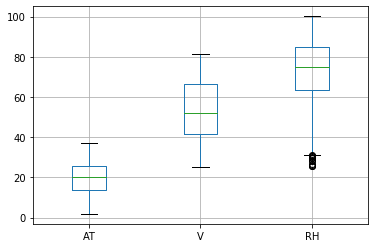

In [12]:
import matplotlib.pyplot as plt
boxplot = df.boxplot(column=['AT', 'V', 'RH']) 

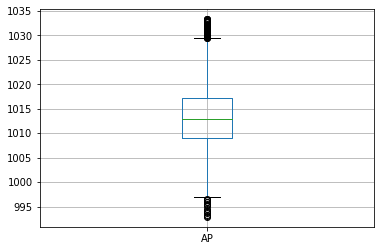

In [13]:
boxplot = df.boxplot(column=['AP'])

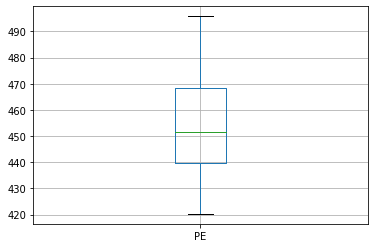

In [14]:
boxplot = df.boxplot(column=['PE'])

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
# how each variable impacts PE, using a scatter plot
def scatter_plot(feature, target):
    plt.figure(figsize=(20, 10))
    plt.scatter(
        df[feature],
        df[target],
        c='black'
    )
    plt.xlabel("Parameter {} ".format(feature))
    plt.ylabel("PE")
    plt.show()

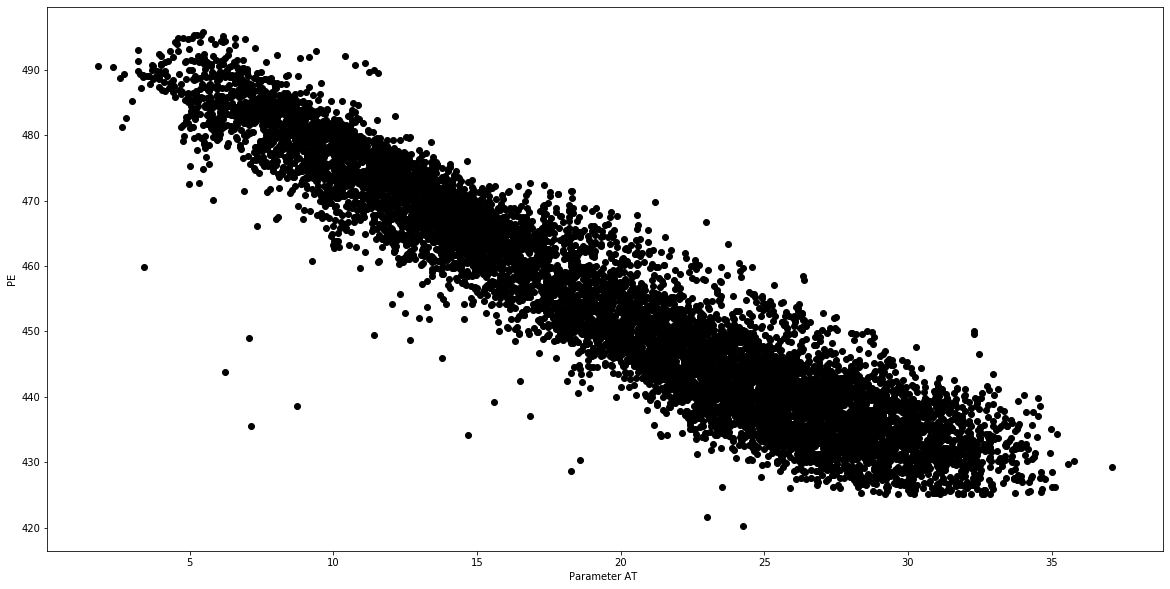

In [16]:
scatter_plot('AT', 'PE')

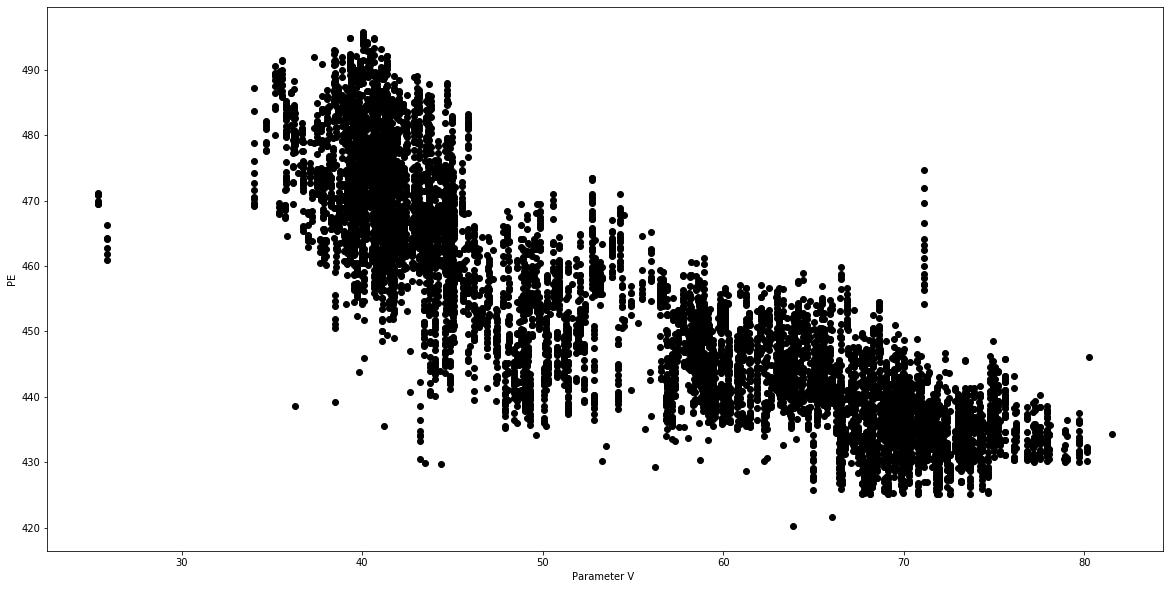

In [17]:
scatter_plot('V', 'PE')

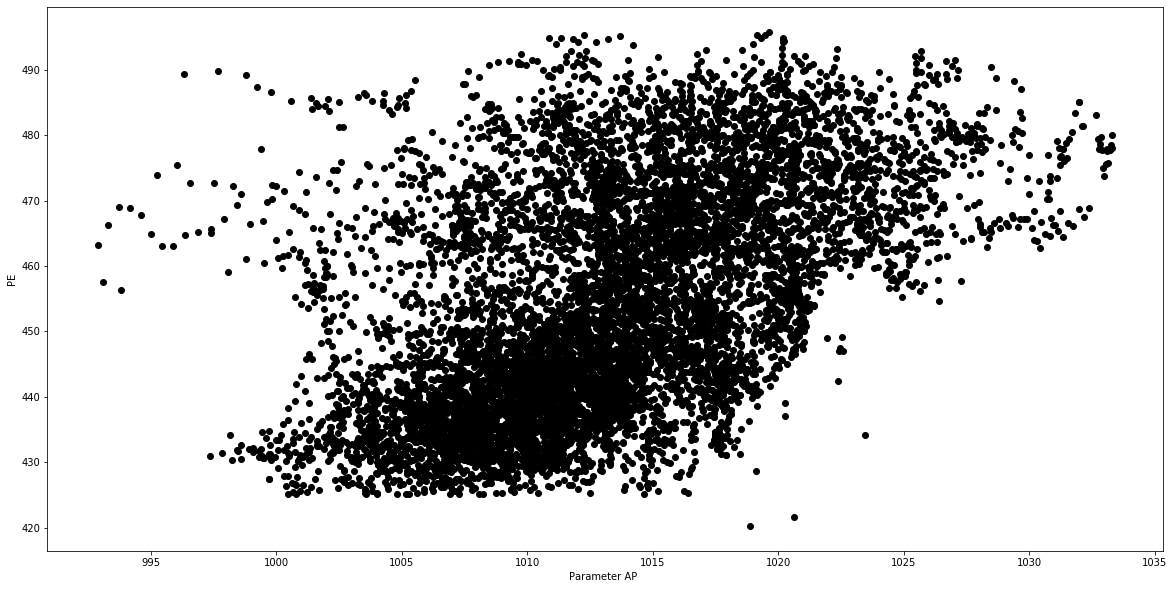

In [18]:
scatter_plot('AP', 'PE')

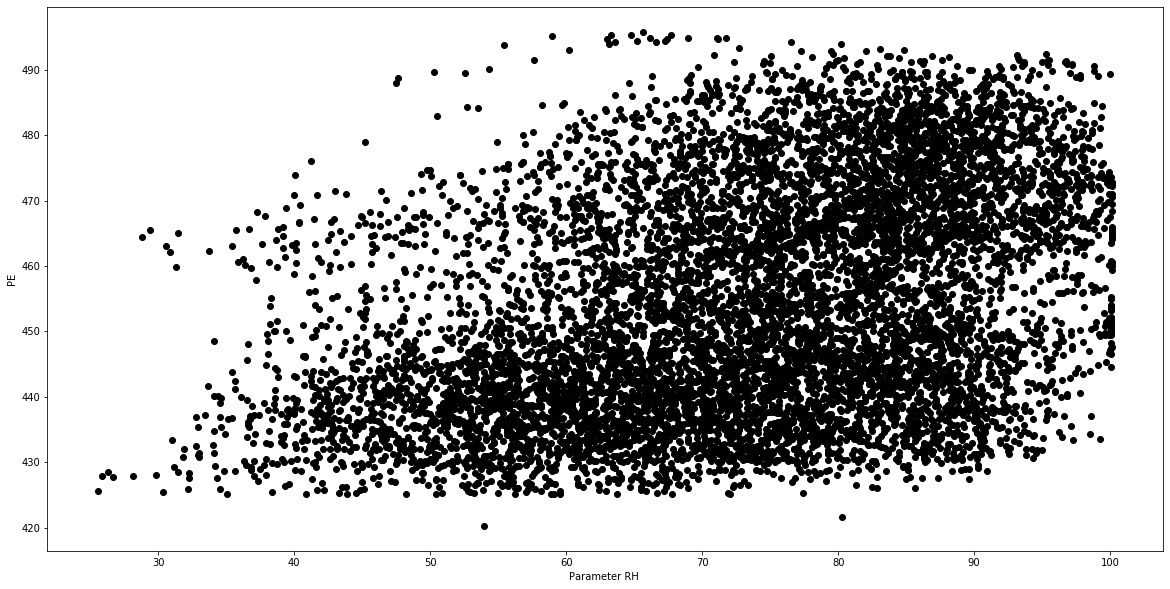

In [19]:
scatter_plot('RH', 'PE')

In [20]:
#Transforming the data frame into matrixes for further steps
#matrix of independant variables (x), and the matrix of dependant variables (y)
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print(x)
print(y)

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]
[463.26 444.37 488.56 ... 429.57 435.74 453.28]


In [21]:
#Feature selection using : backward elimination
import statsmodels.api as sm
xb=np.append(arr=np.ones((9568,1)).astype(int), values=x,axis=1)
x_opt= xb[:,[0,1,2,3,4]]
regressor_ols=sm.OLS(y,x_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Thu, 20 Aug 2020   Prob (F-statistic):               0.00
Time:                        00:59:03   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.000     435.500     473.718
x1            -1.9775      0.015   -129.342      0.000      -2.007      -1.948
x2            -0.2339      0.007    -32.122      0.000      -0.248      -0.220
x3             0.0621      0.009      6.564      0.000       0.044       0.081
x4            -0.1581      0.004    -37.918      0.000      -0.166      -0.150
==============================================================================
Omnibus:                      892.002   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4086.777
Skew:                          -0.352   Prob(JB):                         0.00
Kurtosis:                       6.123   Cond. No.                     2.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
#Splitting the data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [23]:
# least squares regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [24]:
regressor.intercept_

459.94721289587307

In [25]:
regressor.coef_

array([-1.96874028, -0.23852978,  0.05697873, -0.15933335])

In [26]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y_test, y_pred, multioutput='variance_weighted')

0.9321860060402447

In [27]:
mean_squared_error(y_test, y_pred)

20.32999155485004

In [28]:
from sklearn.model_selection import cross_val_score
#k-Fold cross validation
accuracies = cross_val_score(estimator = regressor,X= x_train,y= y_train, cv = 10)

In [29]:
print("Accuracy: %0.5f (+/- %0.2f)" % (accuracies.mean(), accuracies.std()))

Accuracy: 0.92756 (+/- 0.01)


In [30]:
# Ridge regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
ridge_regressor = GridSearchCV(ridge, parameters, cv=5)
ridge_regressor.fit(x_train, y_train)
y_predridge = ridge_regressor.predict(x_test)

In [31]:
ridge_regressor.best_params_

{'alpha': 1e-08}

In [32]:
#alpha of the ridge regression is approximately 0, so here it's similar to the least square regression and have the--
#--same coefficients as least square regression.

In [33]:
mean_squared_error(y_test, y_predridge)

20.329991554850285

In [34]:
r2_score(y_test, y_predridge, multioutput='variance_weighted')

0.9321860060402439

In [35]:
#k-Fold cross validation
accuracies = cross_val_score(estimator = ridge_regressor,X= x_train,y= y_train, cv = 10)
print("Accuracy: %0.5f (+/- %0.2f)" % (accuracies.mean(), accuracies.std()))

Accuracy: 0.92756 (+/- 0.01)


In [37]:
#Lasso regression
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import Lasso

lasso = Lasso()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
lasso_regressor = GridSearchCV(lasso, parameters, cv = 5)
lasso_regressor.fit(x_train, y_train)
y_predlasso = lasso_regressor.predict(x_test)

In [38]:
r2_score(y_test, y_predlasso, multioutput='variance_weighted')

0.9321861855875831

In [39]:
mean_squared_error(y_test, y_predlasso)

20.32993772826262

In [40]:
lasso_regressor.best_params_

{'alpha': 0.001}

In [41]:
#k-Fold cross validation
accuracies = cross_val_score(estimator = lasso_regressor,X= x_train,y= y_train, cv = 10)
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracies.mean(), accuracies.std()))

Accuracy: 0.92756 (+/- 0.00633)


In [42]:
#Elastic Net regression
from sklearn.linear_model import ElasticNet
Elastic=ElasticNet()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
Elastic_regressor = GridSearchCV(Elastic, parameters, cv = 5)
Elastic_regressor.fit(x_train, y_train)
y_predelastic = Elastic_regressor.predict(x_test)

In [43]:
r2_score(y_test, y_predelastic, multioutput='variance_weighted')

0.9321858239208343

In [44]:
mean_squared_error(y_test, y_predelastic)

20.3300461525202

In [45]:
Elastic_regressor.best_params_

{'alpha': 0.001}

In [46]:
#k-Fold cross validation
accuracies = cross_val_score(estimator = Elastic_regressor,X= x_train,y= y_train, cv = 10)
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracies.mean(), accuracies.std()))

Accuracy: 0.92756 (+/- 0.00632)


In [47]:
r2score=[r2_score(y_test, y_pred, multioutput='variance_weighted'),
         r2_score(y_test, y_predridge, multioutput='variance_weighted'),
         r2_score(y_test, y_predlasso, multioutput='variance_weighted'),
         r2_score(y_test, y_predelastic, multioutput='variance_weighted')]

In [48]:
r2score

[0.9321860060402447,
 0.9321860060402439,
 0.9321861855875831,
 0.9321858239208343]

In [49]:
#as a conclusion, the lasso regression gave the best r2 score
MSE=[mean_squared_error(y_test, y_pred),mean_squared_error(y_test, y_predridge),
     mean_squared_error(y_test, y_predlasso),mean_squared_error(y_test, y_predelastic)]

In [50]:
MSE

[20.32999155485004, 20.329991554850285, 20.32993772826262, 20.3300461525202]

In [ ]:
#lasso has the lowest mse error

In [51]:
##Forward Selection(sfs)
#https://towardsdatascience.com/feature-selection-using-wrapper-methods-in-python-f0d352b346f
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

sfs = SFS(LinearRegression(),
           k_features=4,
           forward=True,
           floating=False,
           scoring = 'r2',
           cv = 0)
sfs.fit(x, y)

SequentialFeatureSelector(clone_estimator=True, cv=0,
                          estimator=LinearRegression(copy_X=True,
                                                     fit_intercept=True,
                                                     n_jobs=None,
                                                     normalize=False),
                          fixed_features=None, floating=False, forward=True,
                          k_features=4, n_jobs=1, pre_dispatch='2*n_jobs',
                          scoring='r2', verbose=0)

In [57]:
feature_names = ('AT', 'V', 'AP', 'RH')

In [58]:
sfs.fit(x, y, custom_feature_names=feature_names)

SequentialFeatureSelector(clone_estimator=True, cv=0,
                          estimator=LinearRegression(copy_X=True,
                                                     fit_intercept=True,
                                                     n_jobs=None,
                                                     normalize=False),
                          fixed_features=None, floating=False, forward=True,
                          k_features=4, n_jobs=1, pre_dispatch='2*n_jobs',
                          scoring='r2', verbose=0)

In [59]:

sfs.k_feature_names_

('AT', 'V', 'AP', 'RH')

In [60]:
#The feature selection from 1 to n and their influences.
sfs.subsets_

{1: {'feature_idx': (0,),
  'cv_scores': array([0.8989476]),
  'avg_score': 0.8989475964148236,
  'feature_names': ('AT',)},
 2: {'feature_idx': (0, 3),
  'cv_scores': array([0.92094808]),
  'avg_score': 0.9209480760095282,
  'feature_names': ('AT', 'RH')},
 3: {'feature_idx': (0, 1, 3),
  'cv_scores': array([0.92837482]),
  'avg_score': 0.9283748216583019,
  'feature_names': ('AT', 'V', 'RH')},
 4: {'feature_idx': (0, 1, 2, 3),
  'cv_scores': array([0.92869609]),
  'avg_score': 0.9286960898122536,
  'feature_names': ('AT', 'V', 'AP', 'RH')}}

In [61]:
#the prediction score for these 4 features can be accesses via k_score.
sfs.k_score_

0.9286960898122536